In [63]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from math import sqrt,fabs
import numpy as np

In [64]:
from sklearn import datasets

In [65]:
def RMSE(y_teste:np.ndarray,y_previsto:np.ndarray):
  n = y_teste.shape[0]
  rmse = sqrt( (((y_teste-y_previsto)**2).sum()/n) )

  return rmse

def MAE(y_teste:np.ndarray,y_previsto:np.ndarray):
  n = y_teste.shape[0]
  dif = y_teste-y_previsto

  value = 0
  for i in range(dif.shape[0]):
    value+=fabs(dif[i])
  mae = value/n

  return mae

def Score(y_teste:np.ndarray,previsao:np.ndarray):
  n = y_teste.shape[0]
  dif = y_teste==previsao

  for i in range(dif.shape[0]):
    if dif[i]: dif[i] = 1

  score = dif.sum()/n

  return score


class SVM:

  def __init__(self,num_iter:int):
    self.num_iter = num_iter
    self.modelSVM = None
    self.scaler = None
  
  def tableMetrics(self,mae,rmse,score):
    dataset = pd.DataFrame({'MAE':[mae],'RMSE':[rmse],'Score':[score]})
    return dataset

  def treino(self, X_treino:np.ndarray, y_treino:np.ndarray):
    self.scaler = StandardScaler().fit(X_treino)
    X_treino_standard = self.scaler.transform(X_treino)
    self.modelSVM = SVC(max_iter=self.num_iter)
    self.modelSVM.fit(X_treino_standard,y_treino)

  def prediction(self,X_teste):
    X_teste_standard = self.scaler.transform(X_teste)
    previsoes = self.modelSVM.predict(X_teste_standard)
    return previsoes

  def metrics(self,y_teste:np.ndarray,previsoes:np.ndarray):
    mae = MAE(y_teste,previsoes)
    rmse = RMSE(y_teste,previsoes)
    score = Score(y_teste,previsoes)

    return self.tableMetrics(mae,rmse,score)

#Teste com dataset "Iris"

In [66]:
data = datasets.load_iris()

In [67]:
X = data.data
y = data.target

"Hold out" para dividir os dados em treino e teste

In [68]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,
                                                     y,
                                                     test_size = 0.3,
                                                     random_state=0)

In [69]:
svm = SVM(200)

svm.treino(X_treino,y_treino)
previsoes = svm.prediction(X_teste)

print(svm.metrics(y_teste,previsoes))

        MAE      RMSE     Score
0  0.022222  0.149071  0.977778


#Teste com dataset "breast_cancer"

In [70]:
data = datasets.load_breast_cancer()

In [71]:
X = data.data
y = data.target

In [72]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['class'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Checagem do total de ocorrências da classe a se prever

In [73]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

"Hold out" para dividir os dados em treino e teste

In [74]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,
                                                     y,
                                                     test_size=0.3,
                                                     random_state=0)

In [75]:
svm1 = SVM(200)

svm1.treino(X_treino,y_treino)
previsoes = svm1.prediction(X_teste)

print(svm1.metrics(y_teste,previsoes))

        MAE      RMSE     Score
0  0.023392  0.152944  0.976608


In [76]:
print(classification_report(y_teste, previsoes, labels=[0,1], digits=4))

              precision    recall  f1-score   support

           0     0.9836    0.9524    0.9677        63
           1     0.9727    0.9907    0.9817       108

    accuracy                         0.9766       171
   macro avg     0.9782    0.9716    0.9747       171
weighted avg     0.9767    0.9766    0.9765       171



Matriz de confusão padronizada

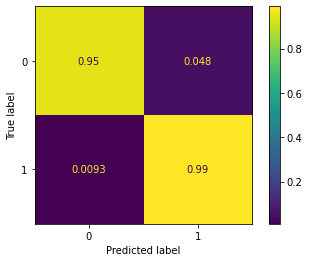

In [77]:
ConfusionMatrixDisplay.from_predictions(y_true=y_teste,y_pred=previsoes,normalize='true')
plt.show()